In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import torch
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
import os
import glob
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import datasets, linear_model, metrics

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', None)

np.random.seed(0)

In [2]:
data_dir = Path("../../../Datasets/Arduino_dataset/") 

In [3]:
# Params
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.1,
          'loss': 'ls'}

In [4]:
def convert(df: pd.DataFrame, frame_size=10):
    x = np.asarray(df.iloc[:, 1]).reshape(-1, frame_size)
#     x = x[x.shape[0]//10:-x.shape[0]//10]
    return x


def change(df4: pd.DataFrame):
    for index, row in df4.iterrows():
        if row['frequency'] != "airflow(m/s)":
            if float(row['frequency']) > 500:
                df4.drop(index, inplace=True)
    return df4

In [5]:

df29 = pd.read_csv(data_dir / "different_distances/Vent1_2_5m.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df29 = df29[df29['frequency'] != "clocktime"]
df29 = df29.dropna()
df29 = change(df29)
df29 = convert(df29)

df30 = pd.read_csv(data_dir / "no_air/noair.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df30 = df30[df30['frequency'] != "clocktime"]
df30 = df30.dropna()
df30 = change(df30)
df30 = convert(df30)

df31 = pd.read_csv(data_dir / "different_distances/Vent1_on_vent.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df31 = df31[df31['frequency'] != "clocktime"]
df31 = df31.dropna()
df31 = change(df31)
df31 = convert(df31)

In [6]:


df32 = pd.read_csv(data_dir / "different_distances/vent1_1m.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df32 = df32[df32['frequency'] != "clocktime"]
df32 = df32.dropna()
df32 = change(df32)
df32 = convert(df32)
dftest1 = df32[-50:]
df32 = df32[-50:]


df34 = pd.read_csv(data_dir / "different_distances/vent1_50cm.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df34 = df34[df34['frequency'] != "clocktime"]
df34 = df34.dropna()
df34 = change(df34)
df34 = convert(df34)
dftest0_5 = df34[-50:]
df34 = df34[:-50]


df35 = pd.read_csv(data_dir / "different_distances/vent1_150cm.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df35 = df35[df35['frequency'] != "clocktime"]
df35 = df35.dropna()
df35 = change(df35)
df35 = convert(df35)

df42 = pd.read_csv(data_dir / "different_distances/vent1_2m.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df42 = df42[df42['frequency'] != "clocktime"]
df42 = df42.dropna()
df42 = convert(df42)





In [7]:
df29[:230]

array([[6.78468117e+04, 2.94057520e+04, 3.27123100e+02, ...,
        3.44804000e+01, 1.81304000e+01, 4.06000000e+00],
       [2.50893810e+03, 1.38918110e+03, 7.96022000e+01, ...,
        8.02222000e+01, 5.98070000e+01, 3.15000000e+00],
       [1.30207890e+03, 5.77532300e+02, 1.70887100e+02, ...,
        2.59987000e+01, 7.49740000e+00, 3.59000000e+00],
       ...,
       [9.65839300e+02, 5.47411700e+02, 1.97853500e+02, ...,
        1.15152000e+01, 1.86388000e+01, 3.15000000e+00],
       [2.25367580e+03, 1.09519670e+03, 1.82429600e+02, ...,
        3.43404000e+01, 1.91085000e+01, 3.74000000e+00],
       [5.19168960e+03, 2.72766140e+03, 4.49870700e+02, ...,
        4.09370000e+01, 2.15120000e+01, 3.51000000e+00]])

In [8]:

df43 = pd.read_csv(data_dir / "different_vents/vent2_1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df43 = df43[df43['frequency'] != "clocktime"]
df43 = df43.dropna()
df43 = convert(df43)
df43 = df43[:-10]
dftest21 = df42[-50:]
df42 = df42[:-50]


df44 = pd.read_csv(data_dir / "different_vents/side_vent_1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df44 = df44[df44['frequency'] != "clocktime"]
df44 = df44.dropna()
df44 = convert(df44)
df44 = df44[:-10]
dftests1 = df44[-50:]
df44 = df44[:-50]



df45 = pd.read_csv(data_dir / "different_vents/homevent.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df45 = df45[df45['frequency'] != "clocktime"]
df45 = df45.dropna()
df45 = convert(df45)
df45 = df45[:-10]
dftesth1 = df45[-50:]
df45 = df45[:-50]


# df46 = pd.read_csv(data_dir9 / "fan_high.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
# df46 = df46[df46['frequency'] != "clocktime"]
# df46 = df46.dropna()
# df46 = convert(df46)
# df46 = df46[:-10]
# dftestf1 = df46[-50:]
# df46 = df46[:-50]



In [9]:

df = np.concatenate([df29, df31, df32, df35, df42])

In [10]:
data = df


In [11]:
X = data[:,:-1]

X = X[:, :7]
X.shape

(1618, 7)

In [12]:
y = data[:, -1]
y.shape


(1618,)

In [13]:
print (X.shape, y.shape)

(1618, 7) (1618,)


In [14]:
print(max(y), min(y))
for i in range(len(y)):
    if i >= len(y):
        break
    if y[i]>35 or y[i]<1:
        print (i, y[i])
        X = np.delete(X, i, axis = 0)
        y = np.delete(y, i)
        

32.9 2.63


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)


GradientBoostingRegressor(max_depth=4, min_samples_split=5, n_estimators=500)

In [17]:
from joblib import dump, load
dump(reg, "test_flowSense.joblib")

['test_flowSense.joblib']

In [18]:
y_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

In [19]:
print(y_pred[:5])
print(y_test[:5])

[ 3.44606341  3.34662783  3.71115275  3.42757306 28.51764432]
[ 3.15  3.29  3.51  3.59 27.79]


In [20]:
print(y_train_pred[:5])
print(y_train[:5])

[ 3.65143159  3.43677169  8.00697428  4.10441817 29.73136531]
[ 3.59  3.22  8.58  4.41 29.76]


In [21]:
print("MSE of test: ", mean_squared_error(y_test, y_pred))
print(y_pred.shape)

print("Test Reg score: ", reg.score(X_test, y_test))
    

MSE of test:  3.9949102438800983
(324,)
Test Reg score:  0.9509945042154682


In [22]:
print("MSE of training: ",  mean_squared_error(y_train, y_train_pred))

print("Train Reg score: ", reg.score(X_train, y_train))

MSE of training:  0.030363975543420043
Train Reg score:  0.9996637948890813


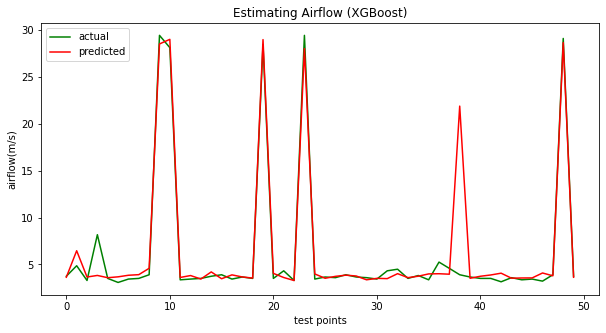

In [23]:
plt.figure(figsize=(10,5))
plt.plot(y_test[50:100], 'g', label="actual")
plt.plot(y_pred[50:100], 'r', label="predicted")
plt.legend()
plt.xlabel("test points")
plt.ylabel("airflow(m/s)")
plt.title("Estimating Airflow (XGBoost)")
plt.savefig("final.png")

Text(0.5, 1.0, 'Estimating Airflow (XGBoost)')

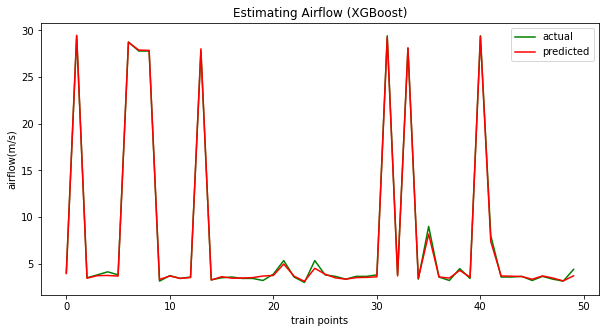

In [24]:
plt.figure(figsize=(10,5))
plt.plot(y_train[50:100], 'g', label="actual")
plt.plot(y_train_pred[50:100], 'r', label="predicted")
plt.legend()
plt.xlabel("train points")
plt.ylabel("airflow(m/s)")
plt.title("Estimating Airflow (XGBoost)")
# plt.savefig("1m_v1.jpg")



Mean Squared Error:  5.62780255966957


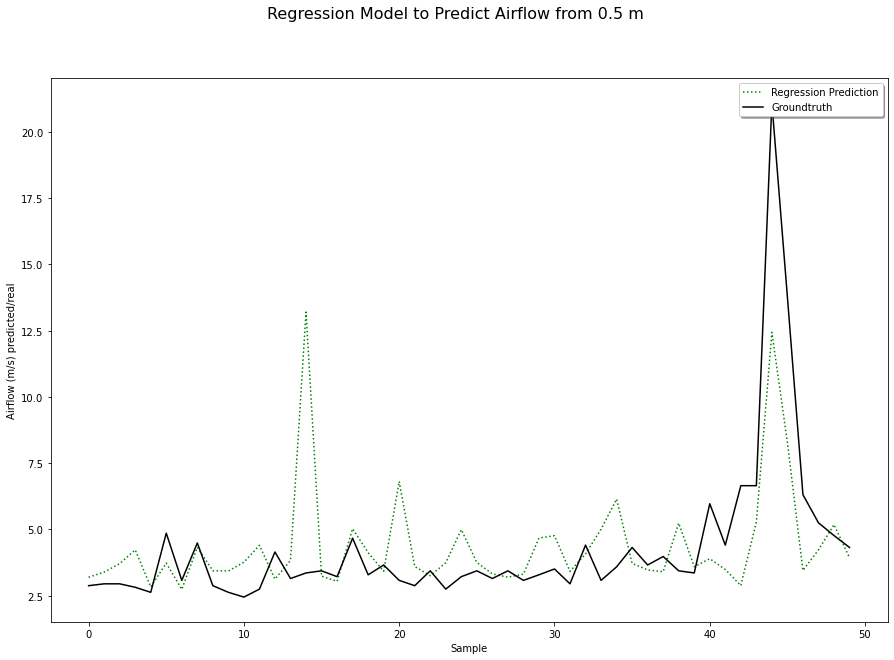

In [27]:

X = dftest0_5[:,:-1]
X = X[:, :7]
X.shape

y = dftest0_5[:, -1]
y.shape

y_pred = reg.predict(X)
print ("Mean Squared Error: ", mean_squared_error(y_pred, y))
    

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Regression Model to Predict Airflow from 0.5 m', fontsize=16)
l0, = ax1.plot(reg.predict(X), 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()

Mean Squared Error:  3.266396411048964


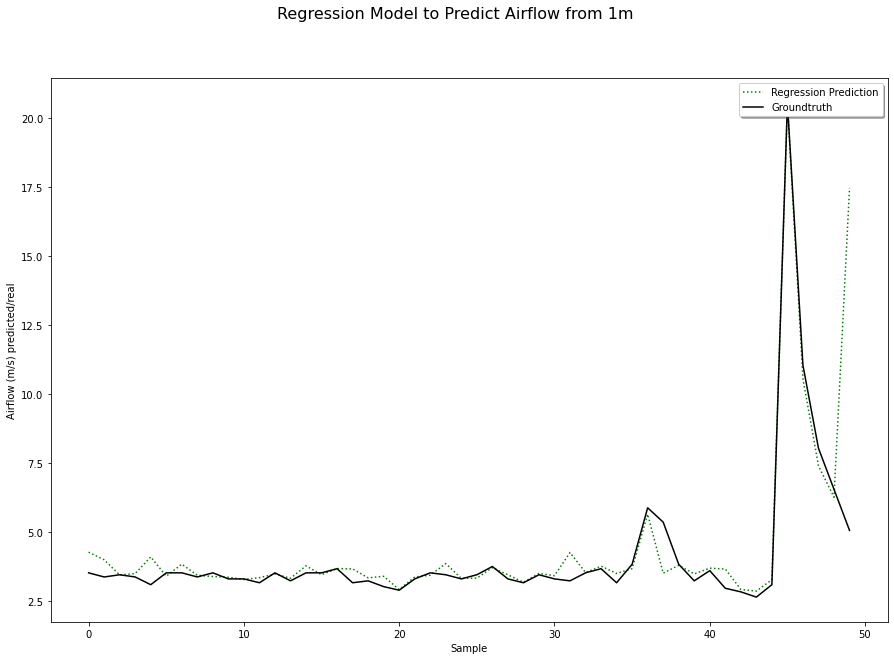

In [28]:

X = dftest1[:,:-1]
X = X[:, :7]
X.shape

y = dftest1[:, -1]
y.shape

y_pred = reg.predict(X)
print ("Mean Squared Error: ", mean_squared_error(y_pred, y))
    

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Regression Model to Predict Airflow from 1m', fontsize=16)
l0, = ax1.plot(reg.predict(X), 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()